# Part I - (Ford GoBike System Data)
## by (Bouchoucha Mohammed)

## Introduction
> The Ford GoBike System Data it is  data set that includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.





## Preliminary Wrangling


In [4]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import datetime as dt


%matplotlib inline

In [5]:
df=pd.read_csv('201902-fordgobike-tripdata.csv')

In [8]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [11]:
print(df.shape)
print(df.dtypes)

(183412, 16)
duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [18]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [19]:
df.duplicated().sum()

0

In [13]:
df.user_type.unique()

array(['Customer', 'Subscriber'], dtype=object)

In [14]:
df.member_gender.unique()

array(['Male', nan, 'Other', 'Female'], dtype=object)

In [15]:
df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [16]:
df['user_type'].value_counts()

Subscriber    163544
Customer       19868
Name: user_type, dtype: int64

In [17]:
df['member_gender'].value_counts()

Male      130651
Female     40844
Other       3652
Name: member_gender, dtype: int64

In [6]:
df['bike_share_for_all_trip'].value_counts()

No     157606
Yes     17346
Name: bike_share_for_all_trip, dtype: int64

### What is the structure of your dataset?

* The data set has been stored as a pandas dataframe, It has 16 columns and 183412 rows.


### What is/are the main feature(s) of interest in your dataset?

* duration_min
* Station start and end



### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

* User_type
* Gender
* Age 
* bike_share_for_all_trip

# Cleaning Data

In [6]:
#drop null value
df.dropna(inplace=True)

In [7]:
#convert start end time to datetime 
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])

In [8]:
#convert yser_type, member_gender and bike_share_for_all_trip to category type 
df.user_type = df.user_type.astype('category')
df.member_gender = df.member_gender.astype('category')
df.bike_share_for_all_trip = df.bike_share_for_all_trip.astype('category')

In [9]:
# convert ids to String
df['start_station_id'] = df['start_station_id'].astype(str)
df['end_station_id'] = df['end_station_id'].astype(str)
df['bike_id'] = df['bike_id'].astype(str)

In [10]:
# Add new column "Age" for easy using
df['Age'] = 2019 - df['member_birth_year']
df['Age'] = df['Age'].astype(int)

In [11]:
#Transfert duration from seconde to minute
df["duration_min"]=df["duration_sec"]/60

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   start_time               174952 non-null  datetime64[ns]
 1   end_time                 174952 non-null  datetime64[ns]
 2   start_station_id         174952 non-null  object        
 3   start_station_name       174952 non-null  object        
 4   end_station_id           174952 non-null  object        
 5   end_station_name         174952 non-null  object        
 6   bike_id                  174952 non-null  object        
 7   user_type                174952 non-null  category      
 8   member_gender            174952 non-null  category      
 9   bike_share_for_all_trip  174952 non-null  category      
 10  Age                      174952 non-null  int32         
 11  duration_min             174952 non-null  float64       
 12  hour_start      

In [12]:
# Drop unnecessary columns
df.drop([ 'member_birth_year','duration_sec'], axis=1, inplace=True)

In [13]:
# extract hour day name and month from start time
df['hour_start']=df['start_time'].dt.hour
df['day_start']=df['start_time'].dt.day_name()
df['month_start']=df['start_time'].dt.month

In [109]:
df.head()

,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_gender,bike_share_for_all_trip,Age,hour_start,day_start,month_start,duration_min
4,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,Male,Yes,45,23,Thursday,2,26.416667
5,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,Male,No,60,23,Thursday,2,29.883333
6,2019-02-28 23:55:35.104,2019-03-01 00:14:42.588,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,-121.901782,3803,Subscriber,Female,No,36,23,Thursday,2,19.116667
7,2019-02-28 23:41:06.766,2019-03-01 00:08:02.756,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6329,Subscriber,Male,No,30,23,Thursday,2,26.916667
8,2019-02-28 23:41:48.790,2019-03-01 00:07:59.715,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6548,Subscriber,Other,No,31,23,Thursday,2,26.166667


In [20]:
df.describe()

,Age,duration_min,hour_start,month_start
count,174952.000000,174952.000000,174952.000000,174952.0
mean,34.196865,11.733379,13.456165,2.0
std,10.118731,27.370082,4.734282,0.0
min,18.000000,1.016667,0.000000,2.0
25%,27.000000,5.383333,9.000000,2.0
50%,32.000000,8.500000,14.000000,2.0
75%,39.000000,13.150000,17.000000,2.0
max,141.000000,1409.133333,23.000000,2.0


In [81]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,Age,hour_start,day_start,month_start
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,35,17,Thursday,2
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,47,12,Thursday,2
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,30,17,Thursday,2
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,45,23,Thursday,2
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No,60,23,Thursday,2


In [25]:
df.describe()

,Age,duration_min,hour_start,month_start
count,170062.000000,170062.000000,170062.000000,170062.0
mean,33.517376,10.282960,13.469123,2.0
std,8.950136,7.363183,4.746850,0.0
min,18.000000,1.016667,0.000000,2.0
25%,27.000000,5.350000,9.000000,2.0
50%,32.000000,8.433333,14.000000,2.0
75%,38.000000,12.966667,17.000000,2.0
max,60.000000,59.933333,23.000000,2.0


In [110]:
df.day_start.unique()

array(['Thursday', 'Wednesday', 'Tuesday', 'Monday', 'Sunday', 'Saturday',
       'Friday'], dtype=object)

# Univariate Exploration




### what is average age using bikes?




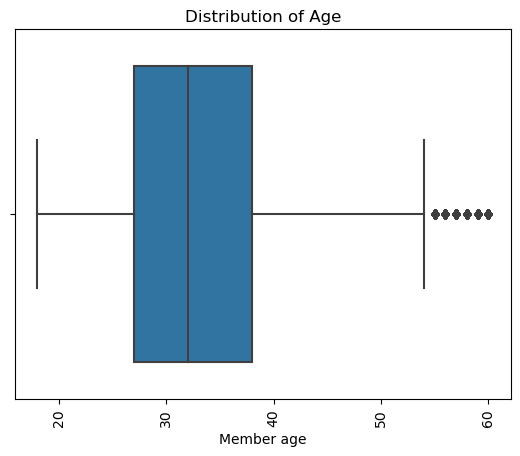

In [18]:

# Create a box plot of the 'Age' column of the DataFrame
sb.boxplot(x=df.Age)

# Rotate the x-axis tick labels by 90 degrees for better readability
plt.xticks(rotation=90)

# Set the x-axis label to 'Member age'
plt.xlabel('Member age')

# Set the plot title to 'Distribution of Age'
plt.title("Distribution of Age")

# Show the plot
plt.show()

#### Most of users are between 25 and 40




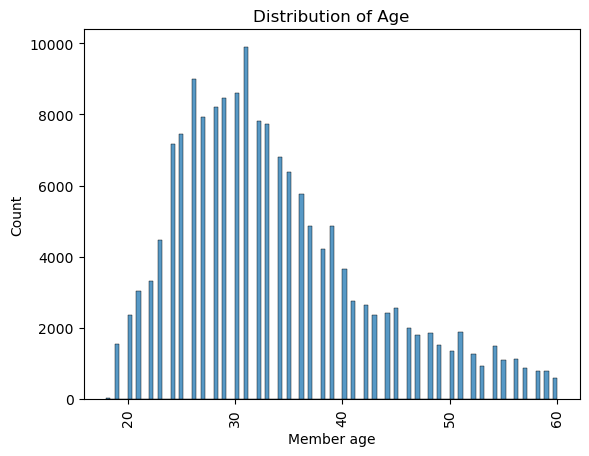

In [19]:
# Create a hist plot of the 'Age' column of the DataFrame
sb.histplot(x=df.Age)

# Rotate the x-axis tick labels by 90 degrees for better readability
plt.xticks(rotation=90)

# Set the x-axis label to 'Member age'
plt.xlabel('Member age')

# Set the plot title to 'Distribution of Age'
plt.title("Distribution of Age")

# Show the plot
plt.show()

#### Most of users are between 25 and 40




### what is the average of trip duration?




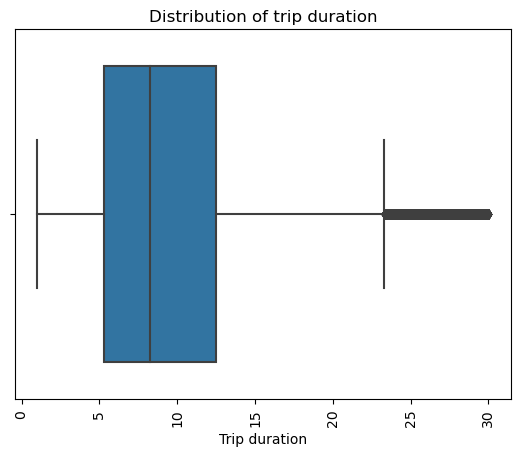

In [85]:
# Create a box plot of the 'duration_min' column of the DataFrame
sb.boxplot(x=df.duration_min)

# Rotate the x-axis tick labels by 90 degrees for better readability
plt.xticks(rotation=90)

# Set the x-axis label to 'Trip duration'
plt.xlabel('Trip duration')

# Set the plot title to 'Distribution of trip duration'
plt.title("Distribution of trip duration")

# Show the plot
plt.show()

#### The average trip duration is between 5 and 13 minutes




In [14]:
#remove outlines from age and duration_min
df = df[df["duration_min"] <= 30]
df = df[df["Age"] <= 60]

### Which day of the week is the most active?




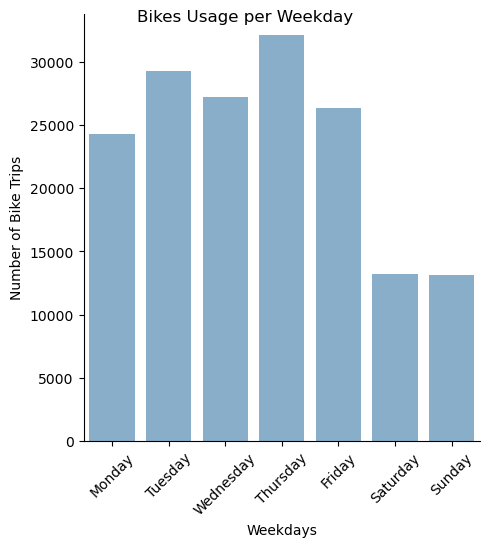

In [20]:
# Define the desired order for the x-axis categories
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Define the desired color for the plot
color = '#7eb0d5'

# Create a categorical plot (count plot) of the 'day_start' column of the DataFrame
# using the specified order and color
plot = sb.catplot(data=df, x='day_start', kind='count', color=color, order=order)

# Set the x-axis label to 'Weekdays' and the y-axis label to 'Number of Bike Trips'
plot.set_axis_labels('Weekdays', 'Number of Bike Trips')

# Set the plot title to 'Bikes Usage per Weekday'
plot.fig.suptitle('Bikes Usage per Weekday')

# Rotate the x-axis tick labels by 45 degrees for better readability
plot.set_xticklabels(rotation=45)

# Show the plot
plt.show()

#### the working days are the more active than the weekend




### which hour of the day is the more active




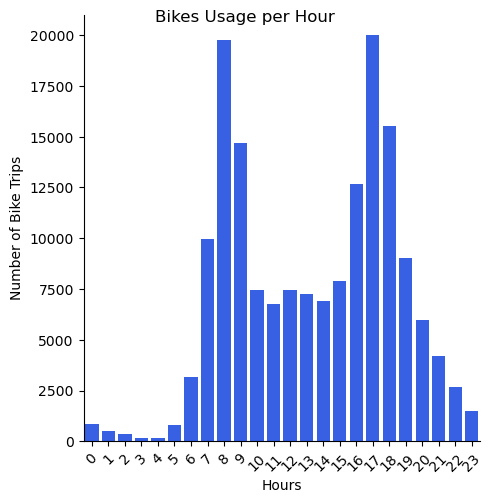

In [21]:

# Define the desired color for the plot
color = '#1a53ff'

# Create a categorical plot (count plot) of the 'hour_start' column of the DataFrame
# using the specified color
plot = sb.catplot(data=df, x='hour_start', kind='count', color=color)

# Set the x-axis label to 'Hours' and the y-axis label to 'Number of Bike Trips'
plot.set_axis_labels('Hours', 'Number of Bike Trips')

# Set the plot title to 'Bikes Usage per Hour'
plot.fig.suptitle('Bikes Usage per Hour')

# Rotate the x-axis tick labels by 45 degrees for better readability
plot.set_xticklabels(rotation=45)

# Show the plot
plt.show()

#### the hours of starting day ("7,8,9") and the ending day ("16,17,18") are most active




#### which gender are using the bikes more often?




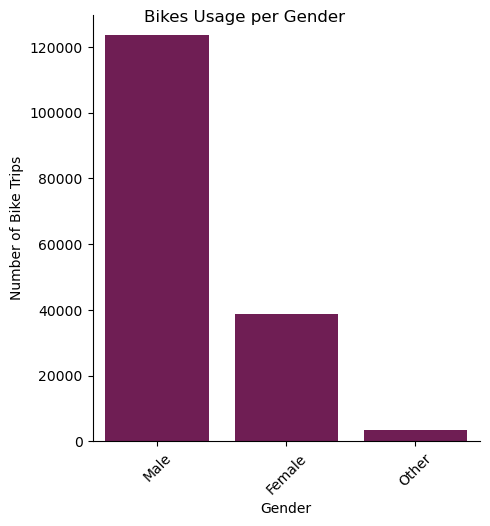

In [22]:
# Get the value counts of the 'member_gender' column of the DataFrame and 
# use them to define the order of the x-axis categories
order = df["member_gender"].value_counts().index

# Define the desired color for the plot
color = '#7c1158'

# Create a categorical plot (count plot) of the 'member_gender' column of the DataFrame
# using the specified color and order of the x-axis categories
plot = sb.catplot(data=df, x='member_gender', kind='count', color=color, order=order)

# Set the x-axis label to 'Gender' and the y-axis label to 'Number of Bike Trips'
plot.set_axis_labels('Gender', 'Number of Bike Trips')

# Set the plot title to 'Bikes Usage per Gender'
plot.fig.suptitle('Bikes Usage per Gender')

# Rotate the x-axis tick labels by 45 degrees for better readability
plot.set_xticklabels(rotation=45)

# Show the plot
plt.show()

#### Like we see Males are the domininat here




#### Which type of user are using the bikes?




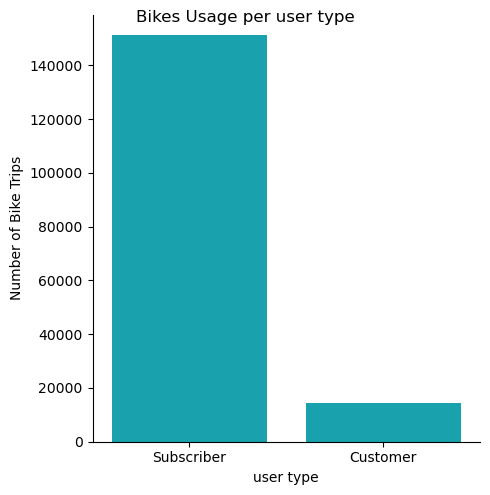

In [23]:
# Get the value counts of the 'user_type' column of the DataFrame and 
# use them to define the order of the x-axis categories
order = df["user_type"].value_counts().index

# Define the desired color for the plot
color = '#00b7c7'

# Create a categorical plot (count plot) of the 'user_type' column of the DataFrame
# using the specified color and order of the x-axis categories
plot = sb.catplot(data=df, x='user_type', kind='count', color=color, order=order)

# Set the x-axis label to 'user type' and the y-axis label to 'Number of Bike Trips'
plot.set_axis_labels('user type', 'Number of Bike Trips')

# Set the plot title to 'Bikes Usage per user type'
plot.fig.suptitle('Bikes Usage per user type')

# Remove the rotation of the x-axis tick labels 
plot.set_xticklabels()

# Show the plot
plt.show()

#### subscriber are much more from customer




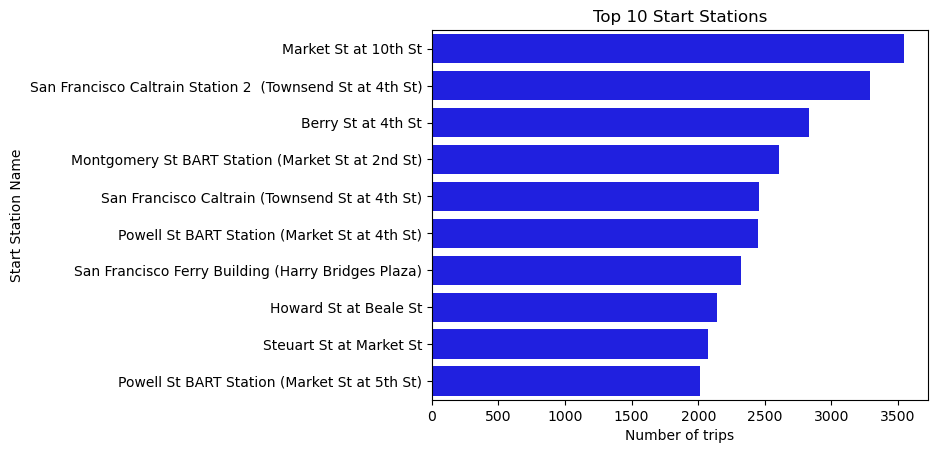

In [24]:
# Get the value counts of the 'start_station_name' column of the DataFrame and 
# sort them in descending order
start_stations = df['start_station_name'].value_counts().sort_values(ascending=False)

# Get the top 10 start stations by selecting the first 10 rows of the 'start_stations' Series
top_start_stations = start_stations[:10]

# Create a bar plot of the top 10 start stations, where the x-axis displays the number of trips 
# and the y-axis displays the start station names
sb.barplot(x=top_start_stations.values, y=top_start_stations.index, color='blue')

# Set the x-axis label to 'Number of trips', the y-axis label to 'Start Station Name', and 
# the plot title to 'Top 10 Start Stations'
plt.xlabel('Number of trips')
plt.ylabel('Start Station Name')
plt.title('Top 10 Start Stations')

# Show the plot
plt.show()



#### here we are seeing the most 10  start station

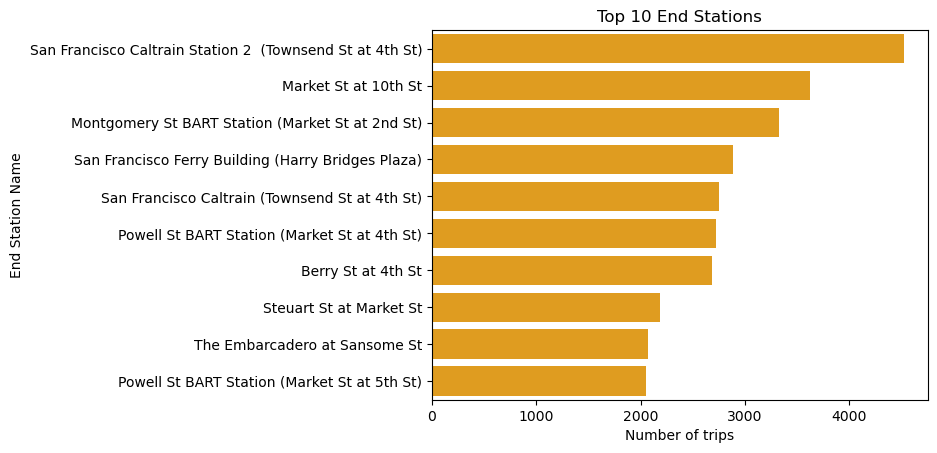

In [25]:
# Get the value counts of the 'end_station_name' column of the DataFrame and 
# sort them in descending order
end_stations = df['end_station_name'].value_counts().sort_values(ascending=False)

# Get the top 10 end stations by selecting the first 10 rows of the 'end_stations' Series
top_end_stations = end_stations[:10]

# Create a bar plot of the top 10 end stations, where the x-axis displays the number of trips 
# and the y-axis displays the end station names
sb.barplot(x=top_end_stations.values, y=top_end_stations.index, color='orange')

# Set the x-axis label to 'Number of trips', the y-axis label to 'End Station Name', and 
# the plot title to 'Top 10 End Stations'
plt.xlabel('Number of trips')
plt.ylabel('End Station Name')
plt.title('Top 10 End Stations')

# Show the plot
plt.show()



#### here we are seeing the most 10  end station

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

We observed that over 96 percent of the trips were less than 30 minutes in duration, while only 0.93 percent lasted more than an hour. These long-duration trips were considered outliers and were excluded before conducting further bivariate analysis. Additionally, we noted that peak hours for trips were between 7-9 am and 4-6 pm, which could be related to the times when employees and students are commuting to and from work or school. This pattern was also reflected in the distribution of trips over weekdays, with the highest demand for trips occurring on workdays.

The age distribution followed a typical skewed-to-the-right pattern, with those aged between 25-40 being the most active population, both in terms of work and study, and the most demanding segment for rides. Regarding user demographics, subscribers represented 89.2 percent of users, while customers accounted for 10.8 percent. Among the user base, 75.7 percent were male, 22.3 percent were female, and the remainder were categorized as other, representing 1.99 percent of the total user base.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

It was surprising to observe that the majority of trips, approximately 96 percent, had a duration of 30 minutes or less. However, we did identify and remove some outliers from the dataset, both in terms of trip duration and age.

Additionally, we utilized the time variable to create new features for our analysis.

# Bivariate Exploration



In [15]:
def plot_bike_trips_by_hour(df):
    # Define a dictionary to map user types to colors
    color = {'Customer': '#1a53ff', 'Subscriber': '#0d88e6'}
    
    # Use the seaborn catplot function to create a bar chart of bike trips by hour and user type
    plot = sb.catplot(data=df, x='hour_start', hue='user_type', kind='count', palette=color)
    
    # Set the x and y axis labels using set_axis_labels
    plot.set_axis_labels('Hours', 'Number of Bike Trips')
    
    # Set the plot title using the suptitle function
    plot.fig.suptitle('Bikes Usage per Hour for every user type')
    
    # Rotate the x-axis tick labels for better readability using set_xticklabels
    plot.set_xticklabels(rotation=45)
    
    # Return the plot object
    return plot

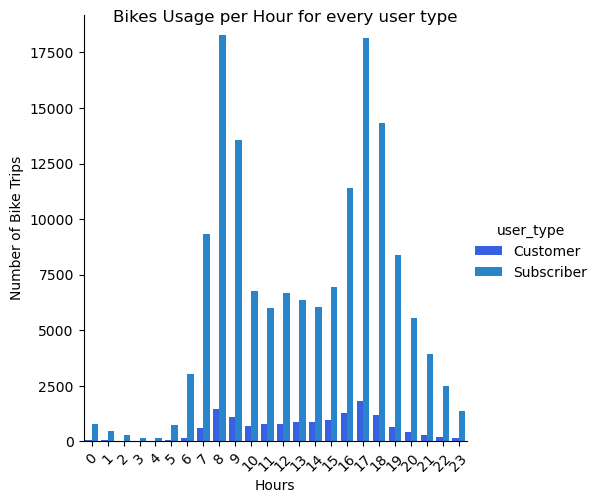

In [17]:
plot_bike_trips_by_hour(df);

#### starting hours by user type, to see if there is a correlation between user type and starting hours





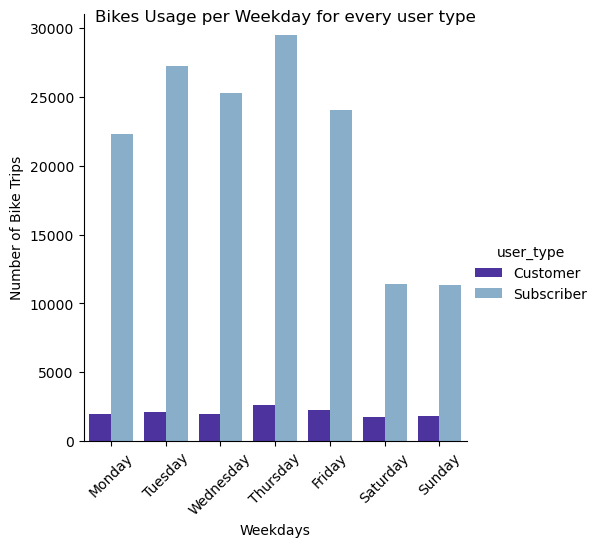

In [27]:
# Define the order of weekdays
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Define the colors for the user types
color = {'Customer': '#4421af', 'Subscriber': '#7eb0d5'}

# Create a catplot to display the count of bike trips by weekday and user type
plot = sb.catplot(data=df, x='day_start', hue='user_type', kind='count', palette=color, order=order)

# Set the axis labels
plot.set_axis_labels('Weekdays', 'Number of Bike Trips')

# Set the title
plot.fig.suptitle('Bikes Usage per Weekday for every user type')

# Rotate the x-axis labels for better readability
plot.set_xticklabels(rotation=45);


#### starting days by user type, to see if there is a correlation between user type and starting days





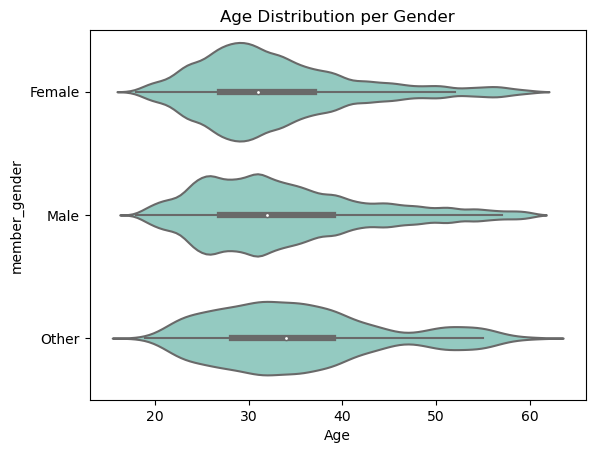

In [28]:
# Set the color for the violin plot
color = '#8bd3c7'

# Create a violin plot for the age distribution of each gender
sb.violinplot(data=df, x='Age', y='member_gender', color=color)

# Set the title for the plot
plt.title('Age Distribution per Gender')

# Show the plot
plt.show()


#### Age average for female are more concentrated in the center and gender other is more distributed





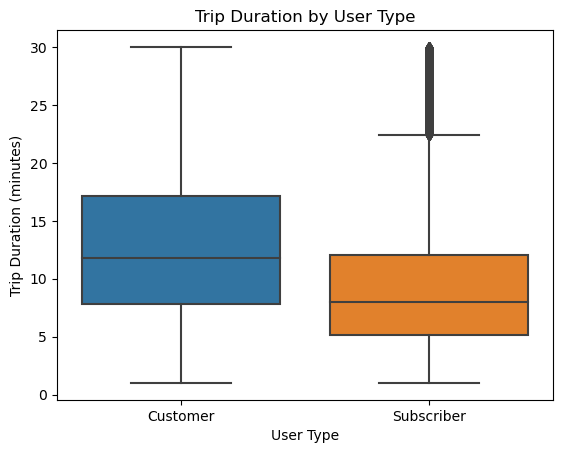

In [29]:
# Create the box plot using the 'boxplot' function from seaborn
# Pass in the dataframe 'df', 'user_type' as the x-axis, and 'duration_min' as the y-axis
# This will create a box plot with two boxes, one for 'Subscriber' and one for 'Customer'
# The box plot shows the median, interquartile range (IQR), and any outliers for each box
sb.boxplot(data=df, x='user_type', y='duration_min')

# Customize the x-axis label with 'User Type'
plt.xlabel('User Type')
# Customize the y-axis label with 'Trip Duration'
plt.ylabel('Trip Duration (minutes)')
# Add a title to the plot with 'Trip Duration by User Type'
plt.title('Trip Duration by User Type')

# Display the plot
plt.show()

#### Trip duration by user type, to see if there is a difference in trip duration between customer and subscriber and it seems that customer has more trip duration





Text(0, 0.5, 'Ride duration')

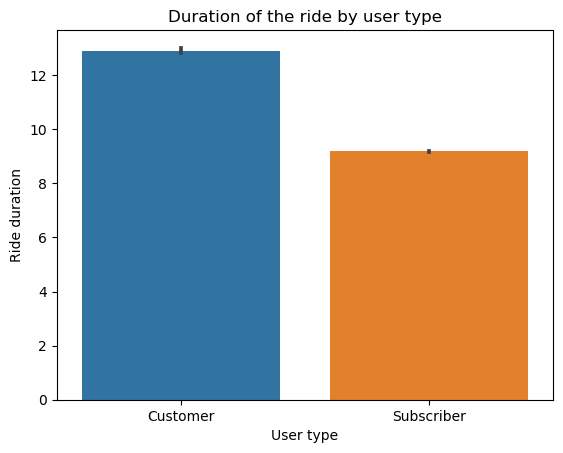

In [30]:
# create a bar plot using Seaborn library, with 'user_type' on the x-axis and 'duration_min' on the y-axis
# the height of each bar represents the average duration of rides for each user type
sb.barplot(data = df, x='user_type', y='duration_min')

# add a title to the plot
plt.title('Duration of the ride by user type')

# add a label to the x-axis
plt.xlabel('User type')

# add a label to the y-axis
plt.ylabel('Ride duration');


#### Trip duration by user type, to see if there is a difference in trip duration between customer and subscriber and it seems that customer has more trip duration





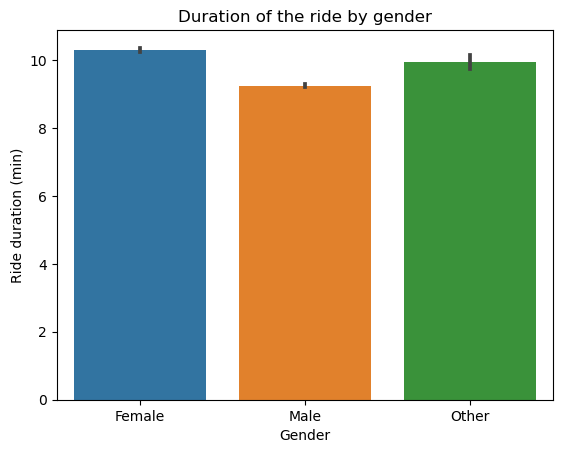

In [31]:
# create a bar plot to show the duration of the ride by gender using seaborn library
# set the data to be used and the x and y variables
# set the x variable to 'member_gender' and the y variable to 'duration_min'
# assign the plot to the variable 'plot'
plot = sb.barplot(data=df, x='member_gender', y='duration_min')

# set the plot title and labels for the x and y axes
plt.title('Duration of the ride by gender')
plt.xlabel('Gender')
plt.ylabel('Ride duration (min)')

# display the plot
plt.show();


#### Trip duration by gender, to see if there is a difference in trip duration between them and it seems that female has more trip duration





### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

The number of subscribers is significantly higher than the number of customers. Subscribers use the bike-sharing service consistently and frequently, primarily for daily routine purposes such as commuting to work or school. This is reflected in their usage patterns, which peak during rush hours on weekdays. Customers, on the other hand, use the service less frequently and for leisure purposes such as sightseeing or exploring the city. Their usage patterns peak during weekends, particularly in the middle of the day and at night.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

Based on the data, female and "Other" gender users had slightly longer trips and rode for a longer duration on average than male users.

# Multivariate Exploration



#### is there any relation betwen specific  hour and specific days?





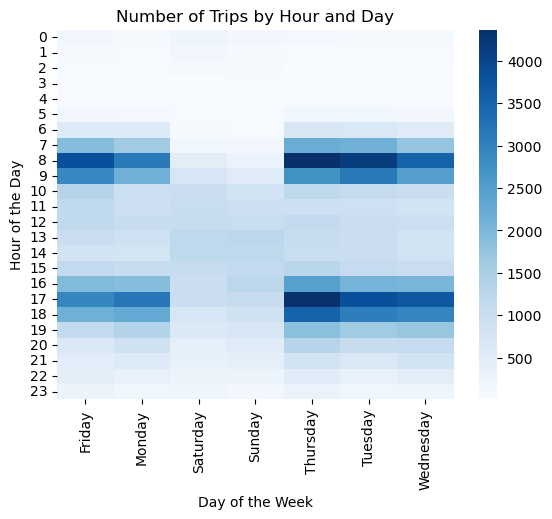

In [32]:
# Group the dataframe by hour_start and day_start and count the number of trips for each combination
trips_by_hour_day = df.groupby(['hour_start', 'day_start']).size().unstack()

# Plot a heatmap using the trips_by_hour_day dataframe
# Set the color map to 'Blues'
sb.heatmap(trips_by_hour_day, cmap='Blues')

# Set the x and y axis labels
plt.xlabel('Day of the Week')
plt.ylabel('Hour of the Day')

# Set the title of the plot
plt.title('Number of Trips by Hour and Day')

# Show the plot
plt.show();


#### we see here that thursday at 8 and 17 is has the most number of trips





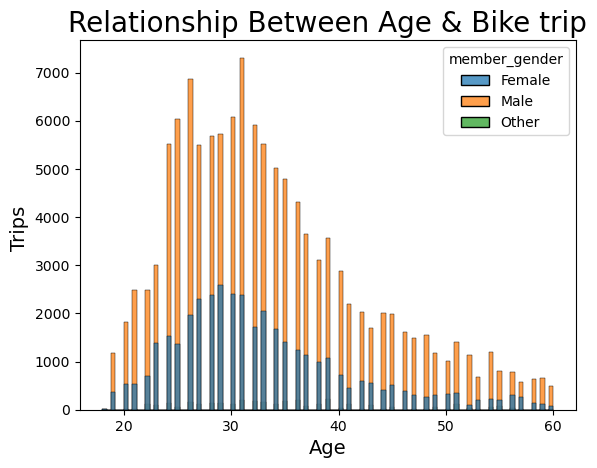

In [33]:
# Plot a histogram of the distribution of bike trips by age and gender
sb.histplot(data=df,  x='Age', hue='member_gender', alpha=0.75)

# Add title and axis labels
plt.title('Relationship Between Age & Bike trip', fontsize=20)
plt.ylabel('Trips ', fontsize=14)
plt.xlabel('Age', fontsize=14);


#### like we see here that the  age is [25,35] has more trips for all gender





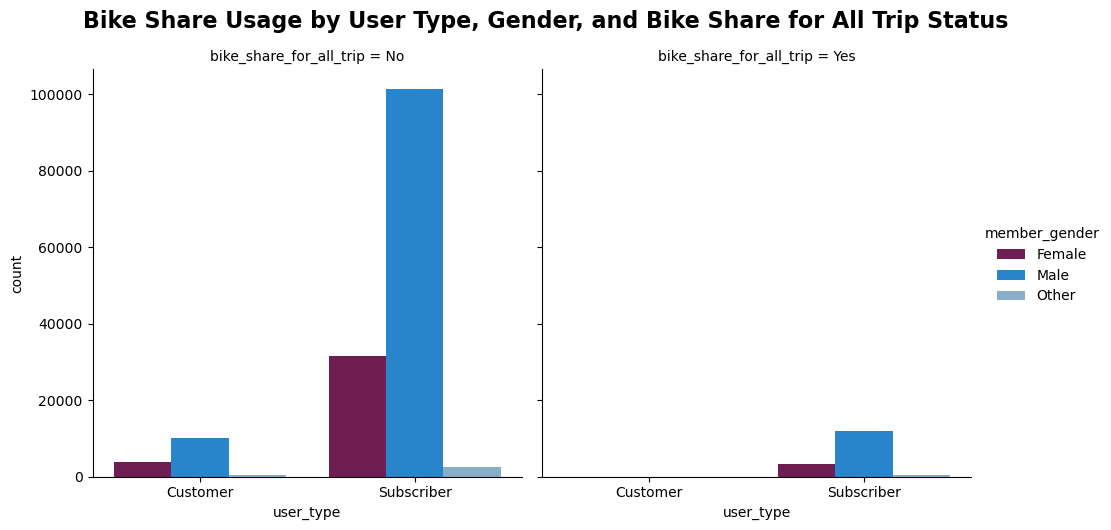

In [34]:
# create a color dictionary for each gender
color = {'Female': '#7c1158', 'Male': '#0d88e6', 'Other': '#7eb0d5'}

# create a categorical plot using Seaborn's catplot to show the number of bike trips
# for each user type and gender, with bike share status as a column
plot = sb.catplot(data=df, x="user_type", hue="member_gender", col="bike_share_for_all_trip", kind="count", palette=color)

# add a title to the plot
plot.fig.suptitle("Bike Share Usage by User Type, Gender, and Bike Share for All Trip Status", y=1.05, fontsize=16, fontweight='bold')

# display the plot
plt.show()


#### we see that no bike_share is way more from share_bike for all gender and both uder type





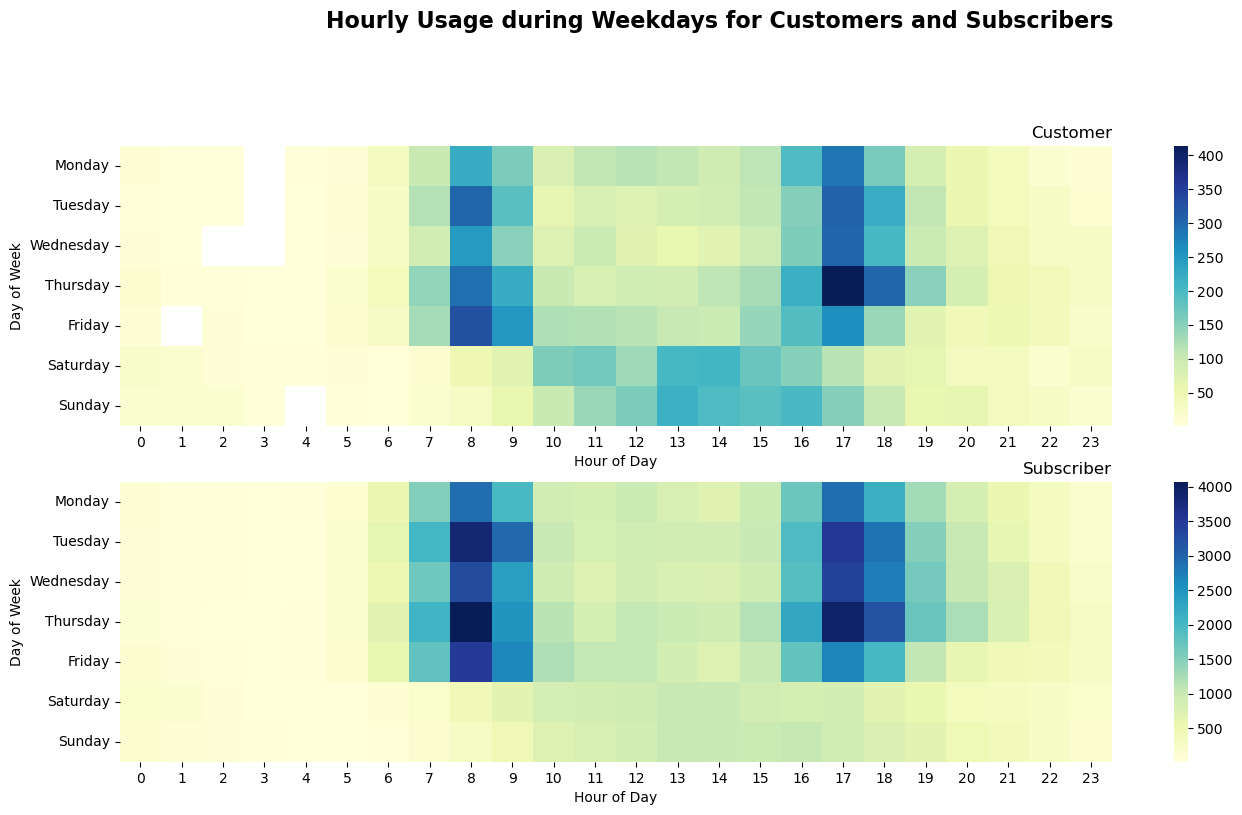

In [35]:
# Define the desired weekday order
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
#set the figure size
plt.figure(figsize=(16, 8))

# Plot the heatmap for Customers
# Create a subplot for the Customers heatmap
plt.subplot(2, 1, 1)

 # Filter the DataFrame to only include Customers
customers = df.query('user_type == "Customer"') 

# Group the data by day and hour, count the number of trips, and reset index
ct_counts = customers.groupby(['day_start', 'hour_start']).size().reset_index(name='count')  

# Set the categories and order for the days of the week
ct_counts['day_start'] = pd.Categorical(ct_counts['day_start'], categories=weekday_order, ordered=True) 

# Convert the data into a pivot table with days of the week on the index and hours of the day on the columns
ct_counts = ct_counts.pivot(index='day_start', columns='hour_start', values='count') 

# Create the heatmap using seaborn
sb.heatmap(ct_counts, cmap='YlGnBu') 

# Add a title for the heatmap
plt.title('Customer', loc='right')  

# Add a label for the x-axis
plt.xlabel('Hour of Day')

# Add a label for the y-axis
plt.ylabel('Day of Week')  

# Plot the heatmap for Subscribers
# Create a subplot for the Subscribers heatmap
plt.subplot(2, 1, 2)

# Filter the DataFrame to only include Subscribers
subscribers = df.query('user_type == "Subscriber"') 

# Group the data by day and hour, count the number of trips, and reset index
st_counts = subscribers.groupby(['day_start', 'hour_start']).size().reset_index(name='count')  

# Set the categories and order for the days of the week
st_counts['day_start'] = pd.Categorical(st_counts['day_start'], categories=weekday_order, ordered=True) 

# Convert the data into a pivot table with days of the week on the index and hours of the day on the columns
st_counts = st_counts.pivot(index='day_start', columns='hour_start', values='count') 

# Create the heatmap using seaborn
sb.heatmap(st_counts, cmap='YlGnBu')  

# Add a title for the heatmap
plt.title('Subscriber', loc='right')  

# Add a label for the x-axis
plt.xlabel('Hour of Day') 

# Add a label for the y-axis
plt.ylabel('Day of Week')  

# Add a super title
plt.suptitle('Hourly Usage during Weekdays for Customers and Subscribers', y=1.05, fontsize=16, fontweight='bold')

# Show the plot
plt.show()

#### Customer are more active on the weekend





### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

* The trips taken by customers were consistently longer than those taken by subscribers.
* Customers tend to have longer trips throughout the day, but particularly during midnight and midday.
* As we have explained previously, there is a clear difference in usage patterns between customers and subscribers

### Were there any interesting or surprising interactions between features?

Observing that customer rides mostly occur during midnight and midday was surprising

## Conclusions
The Ford GoBike System offers a fantastic, healthy, and environmentally friendly way to move around the city for both leisure and work purposes. The system has two types of clients: subscribers and customers. Subscribers are primarily daily commuters who take short trips to and from work, with a high demand for bikes on weekdays between 8-9am and 5-6pm, and sometimes around lunchtime. On the other hand, customers typically consist of tourists or occasional riders who use the system mostly on weekends to explore the Bay Area.